In [1]:
import sys
print(sys.executable)

/home/hiro/anaconda3/envs/in-context-learning/bin/python


In [2]:
!{sys.executable} -m pip install torch torchvision torchaudio

     |████████████████████████████████| 6.8 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 37.1 MB/s eta 0:00:01
     |████████████████████████████████| 670.2 MB 10 kB/s  eta 0:00:0101��████████████▌    | 575.5 MB 131.1 MB/s eta 0:00:01
     |████████████████████████████████| 23.7 MB 39.5 MB/s eta 0:00:01
     |████████████████████████████████| 823 kB 37.4 MB/s eta 0:00:01
     |████████████████████████████████| 731.7 MB 8.0 kB/s s eta 0:00:01  |▎                               | 5.7 MB 44.1 MB/s eta 0:00:17█▌                    | 264.1 MB 74.2 MB/s eta 0:00:07��████▌           | 468.3 MB 91.5 MB/s eta 0:00:03 111.7 MB/s eta 0:00:03     |███████████████████████████▍    | 627.0 MB 112.4 MB/s eta 0:00:01
     |████████████████████████████████| 410.6 MB 3.1 kB/s s eta 0:00:01
     |████████████████████████████████| 121.6 MB 20 kB/s s eta 0:00:01
     |████████████████████████████████| 5.7 MB 60.9 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 84.2 

In [3]:
!{sys.executable} -m pip install munch

In [4]:
!{sys.executable} -m pip install xgboost

In [36]:
from collections import OrderedDict
import re
import os

import torch

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
11,pretrained,decision_tree,Transformer,depth=4,-1,-1,20,12,8,decision_tree_pretrained
39,3f060031-85c7-4e91-bb99-2dfaa5f66b88,decision_tree_relu_attn,Transformer-ReLU,depth=4,-1,-1,20,12,8,decision_tree_standard
9,pretrained,linear_regression,Transformer,,-1,-1,20,12,8,linear_regression_pretrained
27,9a3225b8-ac88-4dea-b450-bcd81aefa081,linear_regression_quantized,linear_regression_standard,,-1,-1,20,12,8,linear_regression_standard
26,fa420c11-13d9-43ab-bf71-b5daa9781fce,linear_regression_quantized,linear_regression_standard,,-1,-1,20,12,8,linear_regression_standard
25,4e7abef8-c89a-463c-a5a5-8ac7fd9fa9f8,linear_regression_quantized,linear_regression_standard,,-1,-1,20,12,8,linear_regression_standard
24,a622a1f6-c87e-4165-bf5c-748c57ff2744,linear_regression_quantized,linear_regression_standard,,-1,-1,20,12,8,linear_regression_standard
23,bf218dd2-6e43-4302-8fee-e7fe8e59ae74,linear_regression_quantized,linear_regression_standard,,-1,-1,20,12,8,linear_regression_standard
22,9329fb0f-8149-4256-8355-6d078bd603be,linear_regression_quantized,linear_regression_standard,,-1,-1,20,12,8,linear_regression_standard
30,9ef4483b-3d5a-4721-b914-246082668a10,linear_regression_quantized,linear_regression_standard,,-1,-1,20,12,8,linear_regression_standard


In [95]:
task = "linear_regression"
# task = "sparse_linear_regression"
# task = "decision_tree"
# task = "relu_2nn_regression"
#task = "linear_regression_relu_attn"

run_id = "95b643f2-b2d0-4a56-abfc-cc07f5871273"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

# Plot pre-computed metrics

In [96]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

linear_regression_standard 95b643f2-b2d0-4a56-abfc-cc07f5871273


100%|██████████| 15/15 [00:00<00:00, 107915.20it/s]


In [97]:
models = relevant_model_names[task]

KeyError: 'Transformer'

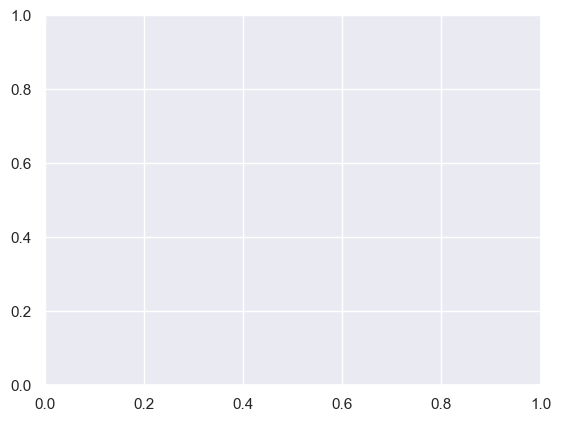

In [99]:
basic_plot(metrics["standard"], models=models)
plt.show()

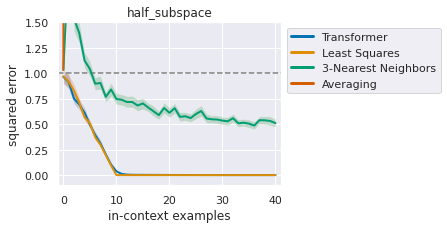

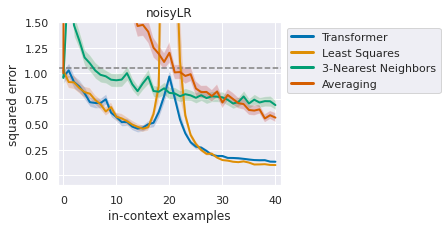

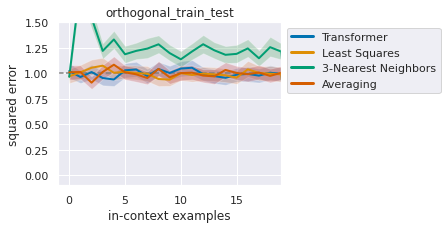

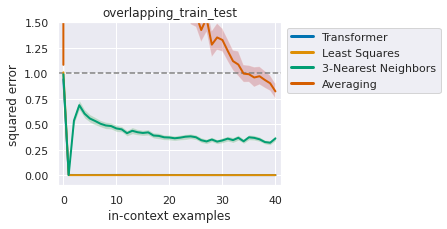

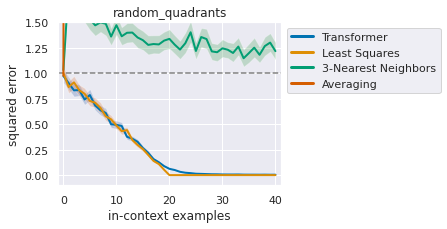

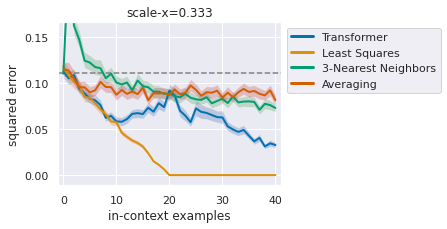

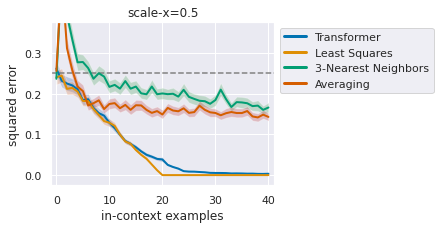

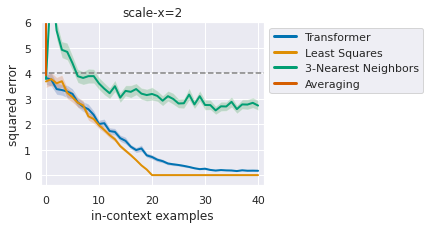

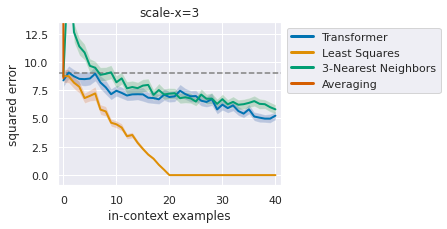

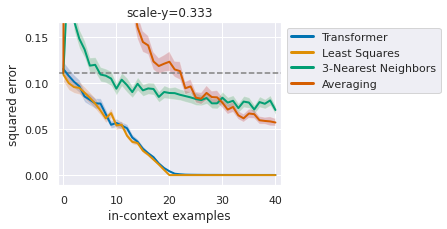

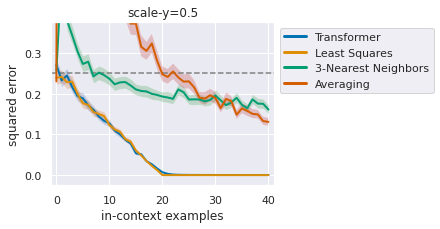

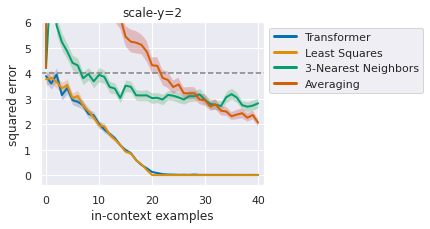

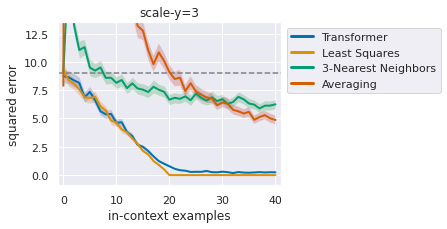

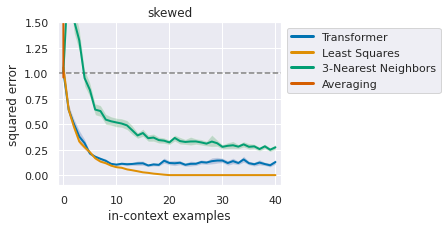

In [5]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [44]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [45]:
from typing import Dict, Callable
import numpy as np

In [46]:
def plot_models(losses: Dict[str, torch.Tensor], baseline: int, no_std_dev: bool = False):
    for label, loss in losses.items():
        loss_means = loss.mean(axis=0)
        label_suffix = "" if no_std_dev else "($\mu \; \pm \; 1\sigma$)"

        plt.plot(loss_means, lw=2, label=f"{label} {label_suffix}")

        if not no_std_dev:
            loss_stds  = loss.std(axis=0)
            plt.fill_between(list(range(loss_means.shape[0])), loss_means-loss_stds, loss_means+loss_stds, alpha=0.2, linewidth=0, antialiased=True)

    plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
    plt.xlabel("# in-context examples")
    plt.ylabel("squared error")
    plt.legend()
    plt.show()

In [47]:
def get_loss_from_run(run_path: str, mutate_xs: Callable = (lambda xs: xs), mutate_ys: Callable = (lambda ys: ys), mutate_bs: Callable = (lambda bs: bs)):
    model, conf = get_model_from_run(run_path)

    n_dims = conf.model.n_dims
    batch_size = mutate_bs(conf.training.batch_size)

    data_sampler = get_data_sampler(conf.training.data, n_dims)
    task_sampler = get_task_sampler(
        conf.training.task,
        n_dims,
        batch_size,
        **conf.training.task_kwargs
    )

    task = task_sampler()
    xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
    xs = mutate_xs(xs)
    ys = mutate_ys(task.evaluate(xs))
    with torch.no_grad():
        pred = model(xs, ys)

    metric = task.get_metric()
    loss = metric(pred, ys).numpy()

    return loss / (mutate_xs(1) ** 2)

In [48]:
def plot_models_from_run(paths: Dict[str, str], mutate_xs: Callable = (lambda xs: xs), mutate_ys: Callable = (lambda ys: ys), 
                         mutate_bs: Callable = (lambda bs: bs), no_std_dev: bool=False):
    """Plot losses for models provided in { "path/to/run" : "plot label" } format"""
    _, conf = get_model_from_run(run_path)
    losses = {
        path : get_loss_from_run(path, mutate_xs, mutate_ys, mutate_bs)
        for path in paths.keys()
    }

    sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
    baseline = {
        "linear_regression": conf.model.n_dims,
        "sparse_linear_regression": sparsity,
        "relu_2nn_regression": conf.model.n_dims,
        "decision_tree": 1,
    }[conf.training.task]

    plot_models(
        { label : losses[path]
          for path, label in paths.items() },
        baseline, no_std_dev
    )

In [49]:
bs8 = lambda bs: bs*8
bs16 = lambda bs: bs* 16

double_x = lambda xs: 2 * xs
half_x = lambda xs: xs / 2


least_sq_loss =  torch.concat((torch.arange(20, -1, -1), torch.zeros((20, ))))

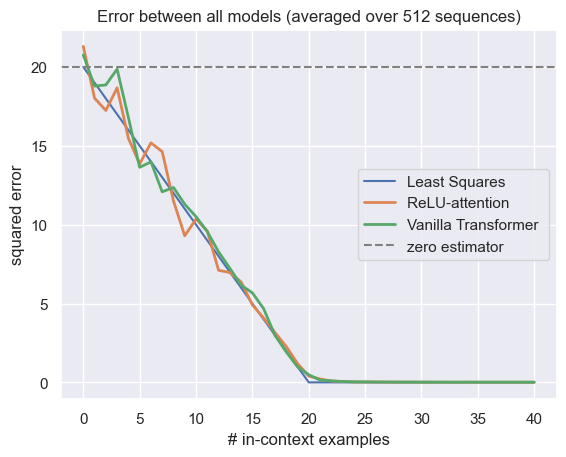

In [56]:
plt.title("Error between all models (averaged over 512 sequences)")
plt.plot(least_sq_loss, label="Least Squares")
plot_models_from_run({
    "../models/linear_regression_relu_attn/95b643f2-b2d0-4a56-abfc-cc07f5871273" : "ReLU-attention", 
    "../models/linear_regression/pretrained" : "Vanilla Transformer"
}, no_std_dev=True, mutate_bs=bs8)

### Doubling Inputs

In [57]:
relu_losses_1x = get_loss_from_run(run_path, mutate_bs=bs8)
relu_losses_2x = get_loss_from_run(run_path, mutate_xs=double_x, mutate_bs=bs8)
vanil_losses_2x = get_loss_from_run("../models/linear_regression/pretrained", mutate_xs=double_x, mutate_bs=bs8)
vanil_losses_1x = get_loss_from_run("../models/linear_regression/pretrained", mutate_bs=bs8)

KeyboardInterrupt: 

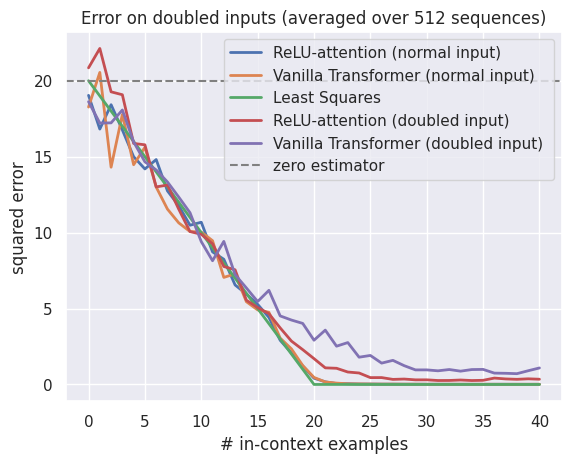

In [53]:
plt.title("Error on doubled inputs (averaged over 512 sequences)")
plot_models({
    "ReLU-attention (normal input)": relu_losses_1x,
    "Vanilla Transformer (normal input)" : vanil_losses_1x,
    "Least Squares" : torch.ones(relu_losses_1x.shape) * least_sq_loss,
    "ReLU-attention (doubled input)": relu_losses_2x,
    "Vanilla Transformer (doubled input)" : vanil_losses_2x,
}, baseline=20, no_std_dev=True)

### Halving Inputs

In [19]:
relu_losses_half = get_loss_from_run(run_path, mutate_xs=half_x, mutate_bs=bs16)
vanil_losses_half = get_loss_from_run("../models/linear_regression/pretrained", mutate_xs=half_x, mutate_bs=bs16)

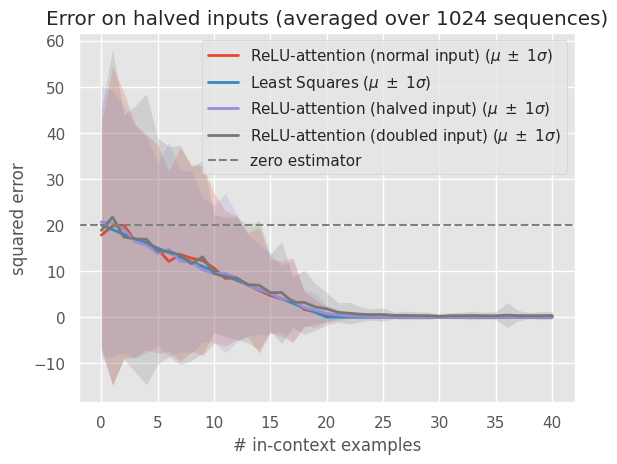

In [26]:
plt.style.use("ggplot")
plt.title("Error on halved inputs (averaged over 1024 sequences)")
# plt.xlim((18, 22))
# plt.ylim((-5, 10))
plot_models({
    "ReLU-attention (normal input)": relu_losses_1x,
    # "Vanilla Transformer (normal input)" : vanil_losses_1x,
    "Least Squares" : torch.ones(relu_losses_1x.shape) * least_sq_loss,
    "ReLU-attention (halved input)": relu_losses_half,
    "ReLU-attention (doubled input)" : relu_losses_2x,
    # "Vanilla Transformer (halved input)" : vanil_losses_half,
}, baseline=20, #no_std_dev=True
) 

### Varying scaling factor

In [10]:
def compute_scaling_loss(run_path, scales = [0.1, 0.5, 1.0, 1.5, 2, 3, 5, 7, 10]):
    losses = [] 

    for scale in scales:
        losses.append(get_loss_from_run(run_path, mutate_xs=(lambda xs: xs*scale), mutate_bs=bs16))
    
    return np.array(losses)

In [55]:
scales = np.concatenate((np.arange(0.1, 1, 0.1), np.arange(1, 11.)))
vanil_scale_loss = compute_scaling_loss("../models/linear_regression/pretrained", scales=scales)
relu_scale_loss = compute_scaling_loss(run_path, scales=scales)

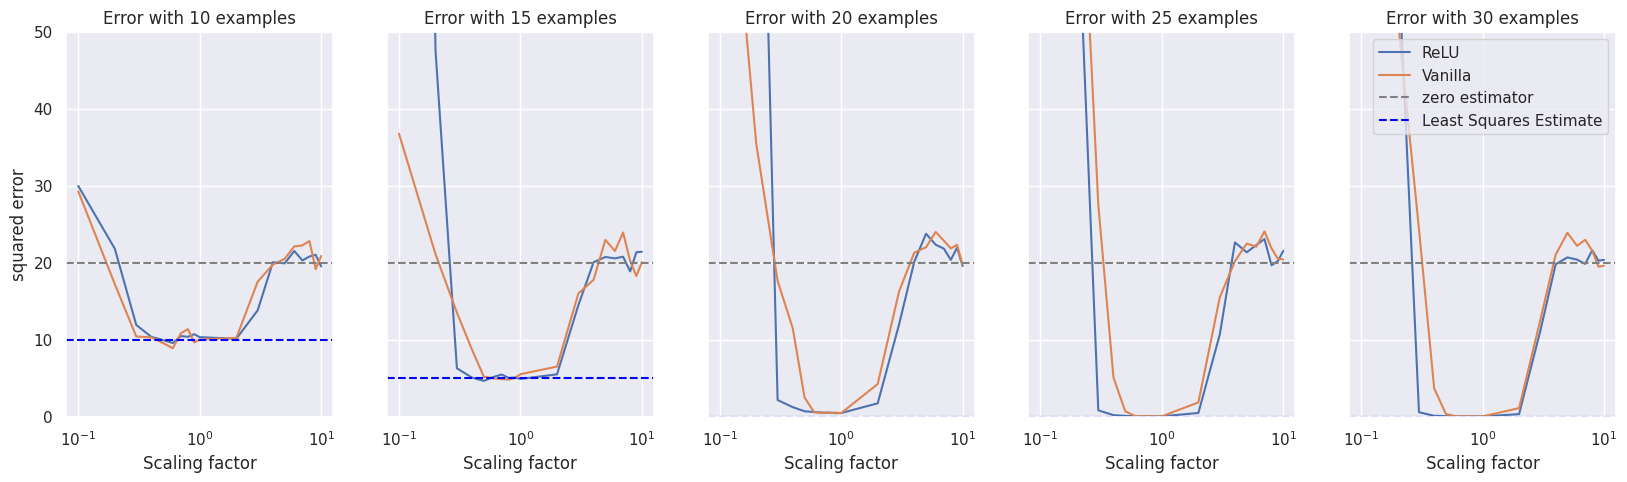

In [56]:
EXAMPLES = [10, 15, 20, 25, 30]

fig, ax = plt.subplots(1, len(EXAMPLES), sharey='all')
fig.set_size_inches(20, 5)
for i, ic_examples in enumerate(EXAMPLES):
    relu_l = relu_scale_loss.swapaxes(-1, 0)[ic_examples]
    vanil_l = vanil_scale_loss.swapaxes(-1, 0)[ic_examples]

    ax[i].plot(scales, relu_l.mean(axis=0), label="ReLU")
    ax[i].plot(scales, vanil_l.mean(axis=0), label="Vanilla")

    ax[i].set_title(f"Error with {ic_examples} examples")
    ax[i].set_xscale('log')
    ax[i].set_xlabel("Scaling factor")
    ax[i].set_ylim(0, 50)
    ax[i].axhline(20, ls="--", color="gray", label="zero estimator")
    ax[i].axhline(least_sq_loss[ic_examples], ls="--", color="blue", label="Least Squares Estimate")
    if i == 0:
        ax[i].set_ylabel("squared error")
    
    if i == len(EXAMPLES) - 1:
        ax[i].legend()

fig.show()

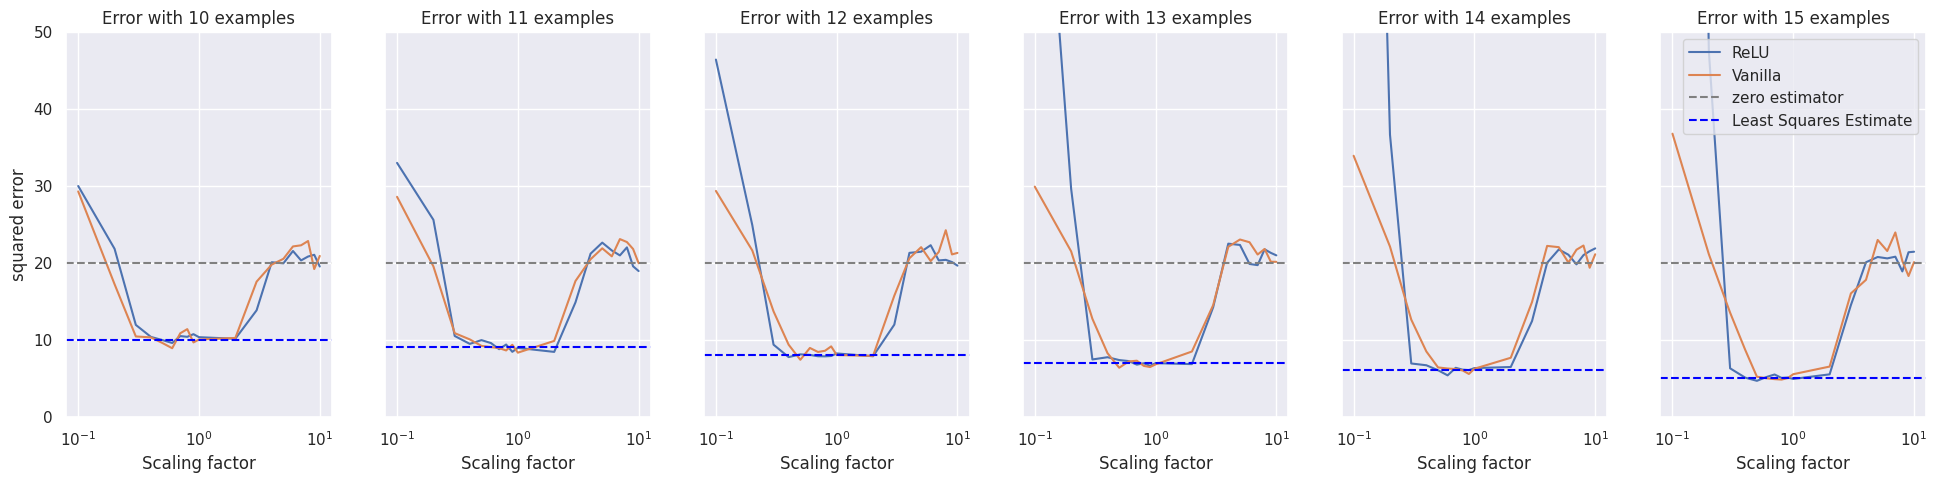

In [57]:
EXAMPLES = [10, 11, 12, 13, 14, 15]

fig, ax = plt.subplots(1, len(EXAMPLES), sharey='all')
fig.set_size_inches(4*len(EXAMPLES), 5)
for i, ic_examples in enumerate(EXAMPLES):
    relu_l = relu_scale_loss.swapaxes(-1, 0)[ic_examples]
    vanil_l = vanil_scale_loss.swapaxes(-1, 0)[ic_examples]

    ax[i].plot(scales, relu_l.mean(axis=0), label="ReLU")
    ax[i].plot(scales, vanil_l.mean(axis=0), label="Vanilla")

    ax[i].set_title(f"Error with {ic_examples} examples")
    ax[i].set_xscale('log')
    ax[i].set_xlabel("Scaling factor")
    ax[i].set_ylim(0, 50)
    ax[i].axhline(20, ls="--", color="gray", label="zero estimator")
    ax[i].axhline(least_sq_loss[ic_examples], ls="--", color="blue", label="Least Squares Estimate")
    if i == 0:
        ax[i].set_ylabel("squared error")
    
    if i == len(EXAMPLES) - 1:
        ax[i].legend()

fig.show()

### Inference time

In [9]:
from time import perf_counter

In [100]:
def time_model_from_run_path(run_path: str, sequence_count: int, num_examples: int, quant = False):
    model, conf = get_model_from_run(run_path)
    if (quant):
        model = torch.ao.quantization.convert(model)
    time_elapsed = 0

    def timed_forward(self, xs, ys, inds=None):
        if inds is None:
            inds = torch.arange(ys.shape[1])
        else:
            inds = torch.tensor(inds)
            if max(inds) >= ys.shape[1] or min(inds) < 0:
                raise ValueError("inds contain indices where xs and ys are not defined")
        zs = self._combine(xs, ys)

        nonlocal time_elapsed
        time_start = perf_counter()
        embeds = self._read_in(zs)
        output = self._backbone(inputs_embeds=embeds).last_hidden_state
        prediction = self._read_out(output)
        time_elapsed = perf_counter() - time_start

        return prediction[:, ::2, 0][:, inds]  # predict only on xs

    data_sampler = get_data_sampler(conf.training.data, conf.model.n_dims)
    xs = data_sampler.sample_xs(b_size=sequence_count, n_points=num_examples+1)

    task_sampler = get_task_sampler(
        conf.training.task,
        conf.model.n_dims,
        sequence_count,
        **conf.training.task_kwargs
    )
    sampled_tasks = task_sampler()
    ys = sampled_tasks.evaluate(xs)

    # overwrite the forward method with our timed one
    model.forward = timed_forward.__get__(
        model,
        model.__class__
    )

    with torch.no_grad():
        pred = model(xs, ys)

    metric = sampled_tasks.get_metric()
    loss = metric(pred, ys).numpy()

    return loss, time_elapsed / sequence_count



In [101]:
def get_abs_loss_and_time(run_path, seq_count, runs=1, quant = False):
    times = []
    errs = []
    for _ in range(runs):
        loss, time = time_model_from_run_path(run_path, sequence_count=seq_count, num_examples=40, quant = quant)
        errs.append(
            loss.mean(axis=0)# - least_sq_loss[0].cpu().numpy()
        )
        times.append(time)

    return np.mean(errs, axis=0), times

In [102]:
import os
os.path.exists("../models/linear_regression/pretrained")

True

In [60]:
RUNS = 10
BATCH_SIZE = 4096
#relu_abs_loss, time_relu = get_abs_loss_and_time(run_path, seq_count=BATCH_SIZE, runs=RUNS)
vanil_abs_loss, time_vanil = get_abs_loss_and_time("../models/linear_regression/pretrained", seq_count=BATCH_SIZE, runs=RUNS)

KeyboardInterrupt: 

In [114]:
RUNS = 1
BATCH_SIZE = 64
quant_abs_loss, time_quant = get_abs_loss_and_time("../models/linear_regression/pretrained", seq_count=BATCH_SIZE, runs=RUNS, quant = True)
vanil_abs_loss, time_vanil = get_abs_loss_and_time("../models/linear_regression/pretrained", seq_count=BATCH_SIZE, runs=RUNS)

In [116]:
import pickle
with open("losses_and_times.pkl", 'wb') as f:
    pickle.dump({
        #"relu_err" : relu_abs_loss, 
        #"relu_times" : time_relu,
        "quant_err" : quant_abs_loss,
        "quant_times" : time_quant,
        "vanil_err" : vanil_abs_loss,
        "vanil_times" : time_vanil
        }, f)

In [117]:
with open("losses_and_times.pkl", "rb") as f:
    d = pickle.load(f)

In [118]:
def format_times(times, title):
    print(title, times, f"(mean: {np.mean(times)} +- {np.std(times)})")
format_times(d["quant_times"], "Quant Times:")
format_times(d["vanil_times"], "Vanil Times:")

Quant Times: [0.019135817656263043] (mean: 0.019135817656263043 +- 0.0)
Vanil Times: [0.016079481812539598] (mean: 0.016079481812539598 +- 0.0)


In [78]:
#SEQ_LENS = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
SEQ_LENS = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
RUNS = 5
relu_abs_losses = []
relu_times = []
vanil_abs_losses = []
vanil_times = []
for seq_len in SEQ_LENS:
    print(f"Running seq len of {seq_len} ... ", end='')
    relu_abs_loss, time_relu = get_abs_loss_and_time(run_path, seq_count=seq_len, runs=RUNS)
    relu_abs_losses.append(relu_abs_loss)
    relu_times.append(time_relu)
    print("ReLU done. ", end='')

    vanil_abs_loss, time_vanil = get_abs_loss_and_time("../models/linear_regression/pretrained", seq_count=seq_len, runs=RUNS)
    vanil_abs_losses.append(vanil_abs_loss)
    vanil_times.append(time_vanil)
    print("Vanilla done. ")

Running seq len of 1 ... ReLU done. Vanilla done. 
Running seq len of 2 ... ReLU done. Vanilla done. 
Running seq len of 4 ... ReLU done. Vanilla done. 
Running seq len of 8 ... ReLU done. Vanilla done. 
Running seq len of 16 ... ReLU done. Vanilla done. 
Running seq len of 32 ... ReLU done. Vanilla done. 
Running seq len of 64 ... ReLU done. Vanilla done. 
Running seq len of 128 ... ReLU done. Vanilla done. 
Running seq len of 256 ... ReLU done. Vanilla done. 
Running seq len of 512 ... ReLU done. Vanilla done. 


In [91]:
in_context_examples = 20
colors=["red", "blue", "green", "purple", "orange", "pink", "black", "gray", "cyan", "yellow", "violet", "brown"]
markers = ["." , "s" , "P" , "v" , "^" , "1", "3", "*", "x", "d", "X", "8"]

start_slice = 5
end_slice = len(relu_times)
relu_x, relu_y   = np.array(relu_times[start_slice:end_slice]) * 1e3, np.array(relu_abs_losses)  [start_slice:end_slice, in_context_examples]
vanil_x, vanil_y = np.array(vanil_times[start_slice:end_slice]) * 1e3, np.array(vanil_abs_losses)[start_slice:end_slice, in_context_examples]
plt.plot(relu_x , relu_y , marker="^", label="ReLU-attention")
plt.plot(vanil_x, vanil_y, marker="o", label='Vanilla attention')
print(start_slice)
print(end_slice)

for i, txt in enumerate(SEQ_LENS[start_slice:end_slice]):
    print(i)
    print(relu_y[i])

for i, txt in enumerate(SEQ_LENS[start_slice:end_slice]):
    plt.annotate(txt, (relu_x[i] , relu_y[i]  + 0.002 ))
    plt.annotate(txt, (vanil_x[i], vanil_y[i] + 0.002 ))
    

plt.title(f"Inference time vs error for various batch sizes")
plt.xlabel("Time taken (ms)")
plt.ylabel(f"Squared error @ {in_context_examples} examples")
plt.legend()

5
10
0
0.46367192
1
0.37045857
2
0.5005404
3
0.44614583
4
0.43008614


TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 640x480 with 1 Axes>

In [ ]:
clustering_start_index = 10

In [ ]:
relu_errs = np.array(relu_abs_losses)[clustering_start_index:, :].T
relu_ts = np.array(relu_times)[clustering_start_index:]

vanil_errs = np.array(vanil_abs_losses)[clustering_start_index:, :].T
vanil_ts = np.array(vanil_times)[clustering_start_index:]

In [ ]:
relu_errs.shape

(41, 3)

In [ ]:
relu_errs[[18, 19, 20, 21]]

array([[2.124315  , 2.1029596 , 2.0678768 ],
       [1.1593037 , 1.1652653 , 1.1356192 ],
       [0.3805564 , 0.43950886, 0.42847118],
       [0.18043153, 0.16847081, 0.16471863]], dtype=float32)

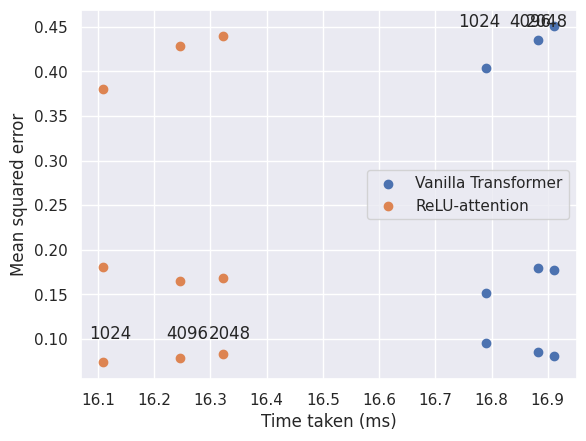

In [ ]:
context_ex = np.array([20, 21, 22])
relu_e = relu_errs[context_ex]
vanil_e = vanil_errs[context_ex]

relu_x = (np.ones(relu_e.shape) * relu_ts).flatten() * 1e3
relu_y = relu_e.flatten()

vanil_x = (np.ones(vanil_e.shape) * vanil_ts).flatten() * 1e3
vanil_y = vanil_e.flatten()

for batch_size, x in zip(SEQ_LENS[clustering_start_index:], relu_ts):
    plt.annotate(batch_size, (x*1e3-0.025, 0.1))

for batch_size, x in zip(SEQ_LENS[clustering_start_index:], vanil_ts):
    plt.annotate(batch_size, (x*1e3-0.05, 0.45))

plt.scatter(vanil_x, vanil_y, label="Vanilla Transformer")
plt.scatter(relu_x, relu_y, label="ReLU-attention")

plt.ylabel("Mean squared error")
plt.xlabel("Time taken (ms)")
plt.legend()

In [ ]:
relu_time, relu_time_std = np.mean(relu_times[clustering_start_index:]), np.std(relu_times[clustering_start_index:])
vanil_time, vanil_time_std = np.mean(vanil_times[clustering_start_index:]), np.std(vanil_times[clustering_start_index:])
relu_time, vanil_time

(0.016244613711328085, 0.016940967548205378)

In [ ]:
data = {
    "relu_times" : relu_times,
    "relu_errs"  : relu_abs_losses,
    "vanil_times" : vanil_times,
    "vanil_errs"  : vanil_abs_losses,
}

In [ ]:
import pickle
with open("inference_time_data.pkl", 'wb') as f:
    pickle.dump(data, f)